In [1]:
import mdtraj as md
import bpmfwfft.grids as grids
import numpy as np

In [2]:
from os import walk
import socket
if socket.gethostname() == 'jim-Mint':
    ppi_path = '/media/jim/Research_TWO/FFT_PPI'
else:
    ppi_path = '/home/jtufts/Desktop/FFT_PPI'

In [3]:
f = {}
for (dirpath, dirnames, filenames) in walk(f'{ppi_path}/2.redock/2.minimize'):
    if filenames[0] != 'run_me.sh':
        if 'complex.pdb' in filenames:
            f[dirpath.split('/')[7]] = dirpath + '/complex.pdb'

In [3]:
import netCDF4 as nc
import numpy as np

grid_path = f'{ppi_path}/2.redock/4.receptor_grid/2OOB_A:B'
grid_nc = '%s/grid.nc'%grid_path


#parsing some of the netcdf variables from grid.nc
grid_variables = nc.Dataset(grid_nc, 'r').variables
counts = nc.Dataset(grid_nc, 'r').variables["counts"][:]
x = nc.Dataset(grid_nc, 'r').variables["x"][:]
y = nc.Dataset(grid_nc, 'r').variables["y"][:]
z = nc.Dataset(grid_nc, 'r').variables["z"][:]
electrostatic = nc.Dataset(grid_nc, 'r').variables["electrostatic"][:]
lja = nc.Dataset(grid_nc, 'r').variables["LJa"][:]
ljr = nc.Dataset(grid_nc, 'r').variables["LJr"][:]
sasai = nc.Dataset(grid_nc, 'r').variables["SASAi"][:]
sasar = nc.Dataset(grid_nc, 'r').variables["SASAr"][:]
trans_crd = nc.Dataset(grid_nc, 'r').variables["trans_crd"][:]
rec_disp = nc.Dataset(grid_nc, 'r').variables["displacement"][:]

In [15]:
from bpmfwfft.grids import RecGrid
from bpmfwfft.grids import LigGrid

rec_prmtop = f"{ppi_path}/2.redock/1.amber/2OOB_A:B/receptor.prmtop"
lj_sigma_scal_fact = 1.0
rec_inpcrd = f"{ppi_path}/2.redock/2.minimize/2OOB_A:B/receptor.inpcrd"

bsite_file = None
grid_nc_file = f"{ppi_path}/2.redock/4.receptor_grid/2OOB_A:B/grid.nc"

lig_prmtop = f"{ppi_path}/2.redock/1.amber/2OOB_A:B/ligand.prmtop"
# lig_inpcrd = f"{ppi_path}/2.redock/2.minimze/2OOB_A:B/ligand.inpcrd"

rot_nc = f"{ppi_path}/2.redock/3.ligand_rand_rot/2OOB_A:B/rotation.nc"
lig_rot = nc.Dataset(rot_nc, 'r').variables['positions'][1]
lig_inpcrd = f"{ppi_path}/2.redock/2.minimize/2OOB_A:B/ligand.inpcrd"

rho = 9.0
rc_scale = 0.76
rs_scale = 0.53
rm_scale = 0.55
lc_scale = 0.81
ls_scale = 0.50
lm_scale = 0.54


def _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, grid_nc_file):
    rec_grid = RecGrid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, 
                        grid_nc_file, new_calculation=False)
    return rec_grid

def _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid):
    lig_grid = LigGrid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid)
    return lig_grid

rec_grid = _create_rec_grid(rec_prmtop, lj_sigma_scal_fact, rc_scale, rs_scale, rm_scale, rho, rec_inpcrd, bsite_file, grid_nc_file)

lig_grid = _create_lig_grid(lig_prmtop, lj_sigma_scal_fact, lc_scale, ls_scale, lm_scale, lig_inpcrd, rec_grid)

lig_grid._crd = np.array(lig_rot, dtype=np.float64)
lig_grid._move_ligand_to_lower_corner()

/home/jtufts/src/p39/fftanalysis
[1.]
/home/jtufts/Desktop/FFT_PPI/2.redock/4.receptor_grid/2OOB_A:B/grid.nc
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  7

In [16]:
names = ["SASA"]
lgrid = lig_grid.get_ligand_grids(names, [0,0,0])

In [17]:
import numpy as np
rgrid = np.add(sasar, sasai*1.j)

In [18]:
print((lgrid["SASA"]*rgrid).sum())

0j


In [9]:
lgrid_trans = grids.translate_grid(lgrid["SASA"], np.array([68,87,45]))

In [10]:
print((lgrid_trans*rgrid).sum())

(551+0j)


In [19]:
# fft test
lfft = np.fft.fftn(lgrid["SASA"].conjugate())
rfft = np.fft.fftn(rgrid)
cfft = np.fft.ifftn(rfft*lfft.conjugate())
score = np.real(cfft) - np.imag(cfft)*1000000

In [34]:
for i in range(9):
    # rx,ry,rz = np.random.randint(0, counts[0], 3)
    # rx = np.random.randint(19, 39, 1)
    # ry = np.random.randint(81, 101, 1)
    # rz = np.random.randint(74, 94, 1)
    rx = np.random.randint(26, 32, 1)
    ry = np.random.randint(113, 119, 1)
    rz = np.random.randint(49, 55, 1)
    lgrid_trans = grids.translate_grid(lgrid["SASA"], [rx,ry,rz])
    result = (lgrid_trans*rgrid).sum()
    print((rx,ry,rz), result, cfft[rx,ry,rz], (np.real(result)-np.imag(result)), score[rx,ry,rz])

(array([29]), array([115]), array([49])) (1324+432j) [1324.+432.j] 892.0 [892.]
(array([30]), array([115]), array([53])) (1523+837j) [1523.+837.j] 686.0 [686.]
(array([26]), array([117]), array([54])) (1295+504j) [1295.+504.j] 791.0 [791.]
(array([28]), array([114]), array([51])) (1426+738j) [1426.+738.j] 688.0 [688.]
(array([27]), array([113]), array([49])) (1281+990j) [1281.+990.j] 291.0 [291.]
(array([31]), array([114]), array([49])) (1395+756j) [1395.+756.j] 639.0 [639.]
(array([28]), array([116]), array([52])) (1363+234j) [1363.+234.j] 1129.0 [1129.]
(array([30]), array([117]), array([50])) (1251+216j) [1251.+216.j] 1035.0 [1035.]
(array([31]), array([114]), array([54])) (1584+1728j) [1584.+1728.j] -144.0 [-144.]


In [20]:
test = np.where(cfft == np.amax(cfft))

test2 = np.where(score == np.amax(score))

print(np.amax(cfft), test)
print(np.amax(score), test2)


(3878.000000000001+8559j) (array([75]), array([74]), array([68]))
903.9999996884186 (array([85]), array([51]), array([106]))


In [21]:
k = 3
argp = np.argpartition(score, -k)[-k:]
args = np.argsort(score)
max_score_ind = np.where(score == np.amax(score))
print(max_score_ind)

(array([85]), array([51]), array([106]))


In [22]:
test3 = np.unravel_index(np.argmax(score, axis=None), score.shape)

In [23]:
print(score[test3], np.amax(score))
flat_score = score.flatten()
flat_argp = np.argpartition(flat_score, -200)[-200:]

903.9999996884186 903.9999996884186


In [24]:
top_scores = flat_score[flat_argp]
top_scores.sort()
translations = []
trans_scores = []

for score_val in top_scores:
    t = np.where(score == score_val)
    a = np.array(t)
    if a.shape == (3,2):
        for x,y,z in a.transpose():
            x = np.array([x])
            y = np.array([y])
            z = np.array([z])
            translations.append((x,y,z))
            trans_scores.append(score[x,y,z])
            print((x,y,z),  score[x,y,z], cfft[x,y,z])
    else:
        translations.append(t)
        trans_scores.append(score[t])
        print(t, score[t], cfft[t])

(array([79]), array([51]), array([38])) [612.00000016] [612.-1.55212277e-13j]
(array([55]), array([61]), array([48])) [612.00000026] [612.-2.58042683e-13j]
(array([50]), array([121]), array([70])) [612.00000057] [612.-5.72267815e-13j]
(array([53]), array([77]), array([44])) [612.9999998] [613.+2.0304998e-13j]
(array([57]), array([56]), array([50])) [612.99999988] [613.+1.18974598e-13j]
(array([101]), array([50]), array([56])) [613.00000007] [613.-6.70554052e-14j]
(array([80]), array([50]), array([107])) [613.00000018] [613.-1.75421434e-13j]
(array([78]), array([46]), array([103])) [613.00000025] [613.-2.48921297e-13j]
(array([75]), array([117]), array([48])) [613.00000026] [613.-2.62801667e-13j]
(array([48]), array([120]), array([73])) [613.99999963] [614.+3.743734e-13j]
(array([50]), array([121]), array([71])) [613.99999964] [614.+3.61682777e-13j]
(array([75]), array([119]), array([53])) [613.99999993] [614.+7.19135346e-14j]
(array([53]), array([76]), array([45])) [614.00000017] [614.

In [ ]:
for j in range(len(translations)):
    print(score[translations[j]], translations[j])

In [40]:
import copy
test1 = copy.deepcopy(rec_grid)

In [43]:
print(test1, rec_grid)

<bpmfwfft.grids.RecGrid object at 0x7fa55bde16d0> <bpmfwfft.grids.RecGrid object at 0x7fa55e4703a0>


In [4]:
import socket
print(socket.gethostname())

jim-Mint


In [ ]:
def cat_grids(grid1, grid2):
    prmtop = cat_dictionaries(grid1._prmtop,grid2._prmtop)
    crd = cat_dictionaries(grid1._crd,grid2._crd)
    cat_grid = copy.deepcopy(grid1)
    cat_grid._prmtop = prmtop
    cat_grid._crd = crd
    return cat_grid

def cat_dictionaries(dict1, dict2):
    dict1_copy = copy.deepcopy(dict1)
    dict2_copy = copy.deepcopy(dict2)
    
    if isinstance(dict1_copy, dict):
        keys = list(dict1_copy.keys())
        for key in keys:
            # print(keys)
            # print(key)
            dict1_copy[key] = cat_values(dict1[key], dict2[key])
        return dict1_copy
    
    elif isinstance(dict1_copy, np.ndarray):
        return np.concatenate((dict1_copy,dict2_copy))

def cat_values(a1, a2):
    array1 = copy.deepcopy(a1)
    array2 = copy.deepcopy(a2)
    if isinstance(array1, np.ndarray):
        return np.concatenate((array1,array2))
    elif isinstance(array1, dict):
        return cat_dictionaries(array1, array2)
    elif isinstance(array1, (int, np.int64)):
        # print(f"{array1+array2}")
        return array1 + array2
    elif isinstance(array1, list):
        # print(type(array1))
        # print(f'array1:{len(array1)}, array2:{len(array2)}')
        array1.extend(array2)
        # print(f'complex:{len(array1)}, sum:{len(a1)+len(a2)}')
        return array1

        
        
import copy
# result = map(cat_dictionaries, rec_grid._prmtop, lig_grid._prmtop)
delta_sasas = []
for v,vector in enumerate(translations):
    vector = (np.array(vector).transpose()*lig_grid._spacing)[0]
    lig_grid._move_ligand_to_lower_corner()
    print(vector)
    lig_grid.translate_ligand(vector)
    com_grid = cat_grids(rec_grid, lig_grid)
    c_sasa = com_grid._get_molecule_sasa(0.14, 960).sum()
    l_sasa = lig_grid._get_molecule_sasa(0.14, 960).sum()
    r_sasa = rec_grid._get_molecule_sasa(0.14, 960).sum()
    d_sasa = (l_sasa + r_sasa) - c_sasa
    delta_sasas.append(d_sasa)
    print(c_sasa, l_sasa + r_sasa, d_sasa)
    com_grid.write_pdb(f'/home/jtufts/Desktop/translations/com/trans{v}.pdb', "w")
    lig_grid.write_pdb(f'/home/jtufts/Desktop/translations/lig/trans{v}.pdb', "w")
    rec_grid.write_pdb(f'/home/jtufts/Desktop/translations/lig/rec.pdb', "w")


Ligand translated by [0. 0. 0.]
[1.11432457 1.41360569 1.04721451]
[39.5 25.5 19. ]
7137.416 7970.092 832.6758
NATOM:2008
NATOM:777
NATOM:1231
Ligand translated by [-39.5 -25.5 -19. ]
[1.11432457 1.41360569 1.04721451]
[27.5 30.5 24. ]
7178.5156 7970.092 791.5762
NATOM:2008
NATOM:777
NATOM:1231
Ligand translated by [-27.5 -30.5 -24. ]
[1.11432457 1.41360569 1.04721451]
[25.  60.5 35. ]
7171.007 7970.092 799.08496
NATOM:2008
NATOM:777
NATOM:1231
Ligand translated by [-25.  -60.5 -35. ]
[1.11432457 1.41360569 1.04721451]
[26.5 38.5 22. ]
6703.874 7970.092 1266.2178
NATOM:2008
NATOM:777
NATOM:1231
Ligand translated by [-26.5 -38.5 -22. ]
[1.11432457 1.41360569 1.04721451]
[28.5 28.  25. ]
7198.1694 7970.092 771.92236
NATOM:2008
NATOM:777
NATOM:1231
Ligand translated by [-28.5 -28.  -25. ]
[1.11432457 1.41360569 1.04721451]
[50.5 25.  28. ]
7054.829 7970.092 915.2627
NATOM:2008
NATOM:777
NATOM:1231
Ligand translated by [-50.5 -25.  -28. ]
[1.11432457 1.41360569 1.04721451]
[40.  25.  53.5]

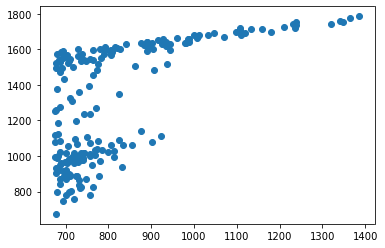

In [244]:
import matplotlib.pyplot as plt
plt.scatter(trans_scores, delta_sasas)
plt.show()

In [ ]:
for u in range(len(translations)):
    print(score[translations[u]], delta_sasas[u])

In [12]:
com_grid.write_pdb('/home/jtufts/Desktop/test.pdb', "w")
com_grid.write_box('/home/jtufts/Desktop/testbox.pdb')

NATOM:2008


In [134]:
# print(cat_dictionaries(rec_grid._prmtop['POINTERS'], lig_grid._prmtop['POINTERS']))
print(com_grid._get_molecule_sasa(0.14, 960).sum())
print(lig_grid._get_molecule_sasa(0.14, 960).sum())
print(rec_grid._get_molecule_sasa(0.14, 960).sum())
print(rec_grid._get_molecule_sasa(0.14, 960).sum()+lig_grid._get_molecule_sasa(0.14, 960).sum())

7170.8086
3486.3755
4483.7715
7970.147


In [119]:
print(lig_grid._molecule_sasa.sum())

5823.7266


In [140]:
import pickle as p
f1 = np.load('/home/jtufts/Desktop/npy/delta_sasa_complex_minus_rl.npy')
f2 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/lig_sasa_sums.p', "rb"))
f3 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/rec_sasa_sums.p', "rb"))
f4 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/lig_sasas.p', "rb"))
f5 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/rec_sasas.p', "rb"))
f6 = p.load(open('/home/jtufts/src/p39/fftanalysis/data/complex_sasas.p', "rb"))
# f4

In [138]:
k2 = list(f2.keys())
k2.sort()
print(k2[127],f2[k2[127]]*100+f3[k2[127]]*100)

2OOB_A:B 7970.235824584961


In [ ]:
lig_grid._move_ligand_to_lower_corner()
ls = lig_grid._get_molecule_sasa(0.14, 960)
rs = rec_grid._get_molecule_sasa(0.14, 960)

for m,val in enumerate(f4[k2[127]][0]):
    print(val,ls[0][m])

In [ ]:
for p,l in enumerate(delta_sasas):
    print(l, f1[127]*100)

In [165]:
(rec_disp - lig_grid._displacement)/0.5

masked_array(data=[68.0, 87.0, 45.0],
             mask=[False, False, False],
       fill_value=1e+20)

In [160]:
rec_disp

masked_array(data=[40.5, 56. , 27. ],
             mask=False,
       fill_value=1e+20)

In [166]:
score[68,87,45]

591.9999999999999

In [167]:
cfft[68,87,45]

(592.0000000000001+2.326614353372607e-13j)

In [169]:
cfft[translations[113]]

array([1040.+1134.j])

In [170]:
translations[113]

(array([29]), array([116]), array([52]))

In [177]:
g = np.where(cfft.imag < 0.0001)

In [180]:
g[0].shape

(577844,)

In [182]:
cfft[29,116,52].real-cfft[29,116,52].imag

-93.99999999999955

In [183]:
score[29,116,52]

-93.99999999999955

In [185]:
score[translations[113]]

array([-94.])

In [5]:
keys = list(rec_grid._prmtop.keys())

import copy
complex_grid = copy.deepcopy(rec_grid)
for key in keys:
    if isinstance(complex_grid._prmtop[key], np.ndarray):
        print(key, complex_grid._prmtop[key].shape)
        complex_grid._prmtop[key] = np.concatenate((rec_grid._prmtop[key],lig_grid._prmtop[key]))
    else:
        subkeys = list(rec_grid._prmtop[key].keys())
        for subkey in subkeys:
            if isinstance(complex_grid._prmtop[key][subkey], np.ndarray):
                print(key, subkey, complex_grid._prmtop[key][subkey].shape)
                complex_grid._prmtop[key][subkey] = np.concatenate((rec_grid._prmtop[key][subkey],lig_grid._prmtop[key][subkey]))
            else:
                subkeys2 = list(rec_grid._prmtop[key][subkey].keys())
                for subkey2 in subkeys2:
                    if isinstance(complex_grid._prmtop[key][subkey], np.ndarray):
                        print(key, subkey, subkey2, complex_grid._prmtop[key][subkey][subkey2].shape)
                        complex_grid._prmtop[key][subkey][subkey2] = np.concatenate((rec_grid._prmtop[key][subkey][subkey2],lig_grid._prmtop[key][subkey][subkey2]))
                
                
print(rec_grid._prmtop["VDW_RADII"].shape(), complex_grid._prmtop["VDW_RADII"])

CHARGE_E_UNIT (1231,)
R_LJ_CHARGE (1231,)
A_LJ_CHARGE (1231,)
LJ_SIGMA (1231,)
LJ_EPSILON (1231,)
VDW_RADII (1231,)


AttributeError: 'numpy.int64' object has no attribute 'keys'

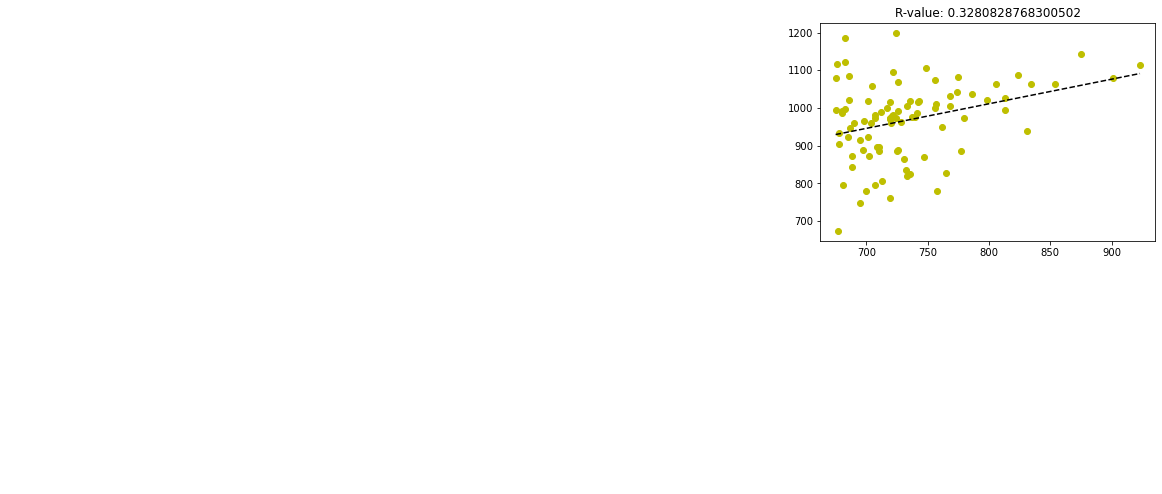

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress




x = np.array(trans_scores)
y = np.array(delta_sasas)

indicies = np.where(y > 1200)
# indicies = np.where(y == 0)

indicies = indicies[::-1]

for i in indicies:
    x = np.delete(x, i)
    y = np.delete(y, i)

indicies = np.where(x == 0)
indicies = indicies[::-1] 

for i in indicies:
    x = np.delete(x, i)
    y = np.delete(y, i)

reg = linregress(x,y)

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
fig, ax = plt.subplots()
m,b = np.polyfit(x, y, 1)
ax.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
ax.annotate("r-value = {:.3f}".format(reg[2]**2), (0, 1))

ax.set_title('R-value: ' + str(reg[2]))
plt.show()

In [261]:
bad = np.where(np.array(delta_sasas) < 1525)
good = np.where(np.array(delta_sasas) > 1525)

In [262]:
# for b in bad[0]:
#     print(b,translations[b],delta_sasas[b],trans_scores[b])

for g in good[0]:
    print(g,translations[g],delta_sasas[g],trans_scores[g])

13 (array([67]), array([87]), array([45])) 1576.1953 [680.99999995]
18 (array([71]), array([87]), array([46])) 1539.937 [684.0000002]
23 (array([71]), array([92]), array([46])) 1527.7339 [686.00000036]
30 (array([68]), array([90]), array([45])) 1586.5249 [689.99999995]
32 (array([71]), array([91]), array([46])) 1551.5889 [693.00000038]
33 (array([67]), array([88]), array([45])) 1592.9702 [693.9999999]
35 (array([67]), array([86]), array([45])) 1558.1606 [694.99999999]
37 (array([71]), array([88]), array([46])) 1558.1499 [696.00000022]
45 (array([71]), array([90]), array([46])) 1563.9878 [702.00000026]
46 (array([71]), array([89]), array([46])) 1565.56 [703.00000007]
53 (array([67]), array([85]), array([45])) 1536.3965 [708.99999987]
58 (array([65]), array([87]), array([44])) 1543.2915 [710.99999938]
79 (array([65]), array([88]), array([44])) 1560.4111 [729.99999943]
80 (array([67]), array([89]), array([45])) 1603.7803 [729.9999998]
89 (array([70]), array([85]), array([46])) 1532.4795 [

In [212]:
print(delta_sasas)

[1729.8843, 1884.2993, 1954.6235, 1891.6519, 1885.7603, 1720.9751, 1842.6211, 1979.8491, 1891.3052, 1801.6665, 1840.5908, 1932.4072, 1876.0, 1890.1431, 1744.2871, 1797.8169, 1715.2251, 1873.623, 1933.0674, 1783.7705, 1760.1255, 1732.6396, 1769.2686, 1818.3613, 1754.0889, 1952.9907, 1915.9062, 1726.3608, 1905.7471, 1776.021, 1835.9043, 1914.7876, 1791.6475, 1787.6934, 1857.8823, 1760.2021, 1799.3159, 1785.7358, 1883.5098, 1838.1729, 1736.1685, 1915.9229, 1750.9634, 1773.6523, 1756.9722, 1815.8477, 1873.1768, 1780.272, 1781.3901, 1807.3906, 1974.4365, 1908.7871, 1770.6567, 1812.2085, 1950.7583, 1746.8325, 1997.5693, 1765.6392, 1781.7974, 1825.5415, 1823.6875, 1801.1528, 1857.7217, 1860.0952, 1934.3569, 1814.1992, 1939.4248, 1825.3599, 1837.8804, 1925.7104, 1796.856, 1840.9106, 1876.169, 1990.5259, 1979.7075, 1866.313, 1889.541, 1801.3784, 1849.3027, 1905.9946, 1830.9331, 1945.2031, 1957.6294, 1834.1504, 1821.312, 1930.1489, 1851.2969, 1907.935, 1876.2866, 1851.1748, 1926.3359, 1861.4062,